# CNN Train Demo

Jim Xie (2020-8-5)

In [1]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.models import model_from_json
import keras.backend as K
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
import pickle
import sys,os
import cv2
import pandas as pd
from mlxtend.data import loadlocal_mnist
import json,os
from keras import utils as np_utils
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def Load_Sample(img_file,label_file):
    raw_x,raw_y = loadlocal_mnist(images_path=img_file, labels_path=label_file)
    y = []
    x = []
    for label,item in zip(raw_y,raw_x):
        y.append(label)
        x.append(item)
    x = np.array(x)
    n_classes = len(np.unique(y))
    y = np_utils.to_categorical(y, n_classes)
    x = x.reshape(x.shape[0], 28, 28, 1)
    return x,y

In [3]:
def ShowImg(img_list):
    rows = 8
    if len(img_list) < 64:
        rows = len(img_list)//8
    fig,ax = plt.subplots(rows,8,figsize=(10,10))
    for j in range(0,rows):
        for i in range(1,9):
            plt.subplot(rows,8,i+j*8)
            plt.imshow(img_list[i+j*8],cmap='gray')
            plt.axis('off') 

In [4]:
m_train_x,m_train_y = Load_Sample('./data/train-images-idx3-ubyte','./data/train-labels-idx1-ubyte')
m_test_x,m_test_y = Load_Sample('./data/t10k-images-idx3-ubyte','./data/t10k-labels-idx1-ubyte')
print("Train sample information ",m_train_x.shape)
print("Train test information ",m_test_x.shape)

Train sample information  (60000, 28, 28, 1)
Train test information  (10000, 28, 28, 1)


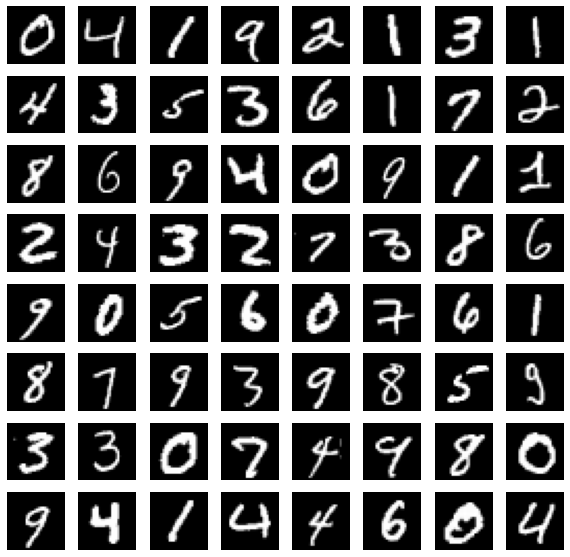

In [5]:
ShowImg(m_train_x)

In [6]:
m_model = Sequential()
m_model.add(Conv2D(24, (3, 3), activation='relu', input_shape=(28,28,1)))
m_model.add(Conv2D(24, (3, 3), activation='relu'))
m_model.add(MaxPooling2D(pool_size=(2,2)))
m_model.add(Dropout(0.25))
m_model.add(Flatten())
m_model.add(Dense(10, activation='softmax'))
m_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [7]:
measure = m_model.fit(m_train_x,m_train_y,batch_size=100,epochs=100,verbose=1,validation_data=(m_test_x,m_test_y))

Epoch 1/100
600/600 [==============================] - 22s 37ms/step - loss: 0.9016 - accuracy: 0.9118 - val_loss: 0.0832 - val_accuracy: 0.9742
Epoch 2/100
600/600 [==============================] - 24s 40ms/step - loss: 0.1043 - accuracy: 0.9681 - val_loss: 0.0656 - val_accuracy: 0.9775
Epoch 3/100
600/600 [==============================] - 25s 42ms/step - loss: 0.0825 - accuracy: 0.9750 - val_loss: 0.0627 - val_accuracy: 0.9814
Epoch 4/100
600/600 [==============================] - 31s 52ms/step - loss: 0.0748 - accuracy: 0.9767 - val_loss: 0.0668 - val_accuracy: 0.9798
Epoch 5/100
600/600 [==============================] - 31s 51ms/step - loss: 0.0654 - accuracy: 0.9801 - val_loss: 0.0588 - val_accuracy: 0.9830
Epoch 6/100
600/600 [==============================] - 31s 51ms/step - loss: 0.0592 - accuracy: 0.9819 - val_loss: 0.0577 - val_accuracy: 0.9831
Epoch 7/100
600/600 [==============================] - 33s 55ms/step - loss: 0.0567 - accuracy: 0.9821 - val_loss: 0.0605 - val_ac

600/600 [==============================] - 21s 35ms/step - loss: 0.0173 - accuracy: 0.9955 - val_loss: 0.0960 - val_accuracy: 0.9868
Epoch 58/100
600/600 [==============================] - 21s 35ms/step - loss: 0.0136 - accuracy: 0.9961 - val_loss: 0.0983 - val_accuracy: 0.9882
Epoch 59/100
600/600 [==============================] - 22s 36ms/step - loss: 0.0144 - accuracy: 0.9962 - val_loss: 0.1014 - val_accuracy: 0.9888
Epoch 60/100
600/600 [==============================] - 22s 36ms/step - loss: 0.0172 - accuracy: 0.9956 - val_loss: 0.1003 - val_accuracy: 0.9865
Epoch 61/100
600/600 [==============================] - 22s 37ms/step - loss: 0.0180 - accuracy: 0.9957 - val_loss: 0.1051 - val_accuracy: 0.9873
Epoch 62/100
600/600 [==============================] - 23s 38ms/step - loss: 0.0171 - accuracy: 0.9955 - val_loss: 0.1051 - val_accuracy: 0.9880
Epoch 63/100
600/600 [==============================] - 21s 35ms/step - loss: 0.0144 - accuracy: 0.9964 - val_loss: 0.0892 - val_accuracy

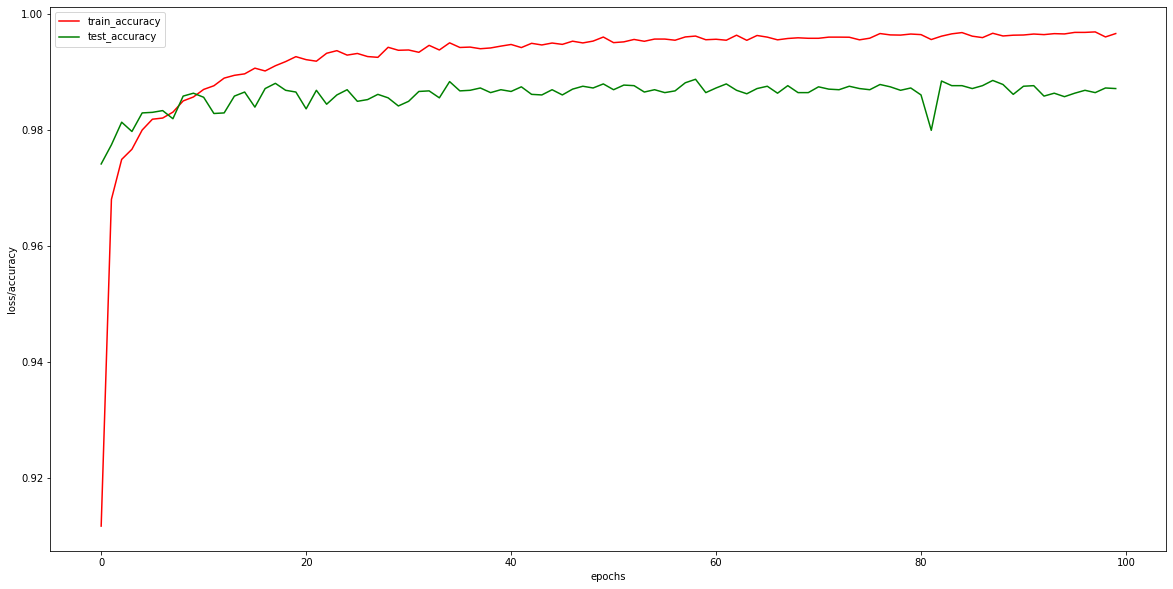

In [8]:
epochs = len(measure.history['loss'])
plt.figure(figsize=(20,10))
#plt.plot(range(0,epochs,1), measure.history['loss'], label='train_loss',color='blue')
#plt.plot(range(0,epochs,1), measure.history['val_loss'], label='test_loss',color='cyan')
plt.plot(range(0,epochs,1), measure.history['accuracy'], label='train_accuracy',color='red')
plt.plot(range(0,epochs,1), measure.history['val_accuracy'], label='test_accuracy',color='green')
plt.xlabel('epochs')
plt.ylabel('loss/accuracy')
plt.legend()
plt.show()

In [9]:
score = m_model.evaluate(m_test_x, m_test_y, verbose=1)
print(score)

313/313 [==============================] - 1s 3ms/step - loss: 0.1290 - accuracy: 0.9872
[0.12896381318569183, 0.9872000217437744]


In [10]:
pred_y = m_model.predict(m_test_x)
pred_score = []
result = {}
for index in range(0,len(m_test_x.tolist())):
    img = m_test_x[index]
    pred_label = np.argmax(pred_y[index])
    pred_score.append(np.max(pred_y[index]))
    if not pred_label in result:
        result[pred_label] = []
    result[pred_label].append(img)

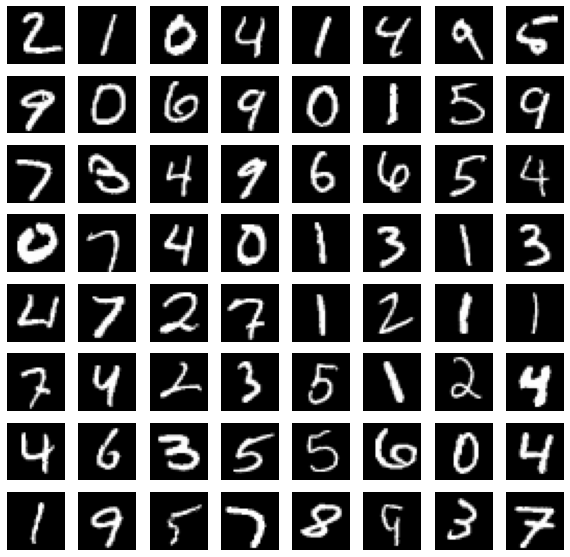

In [11]:
ShowImg(m_test_x)

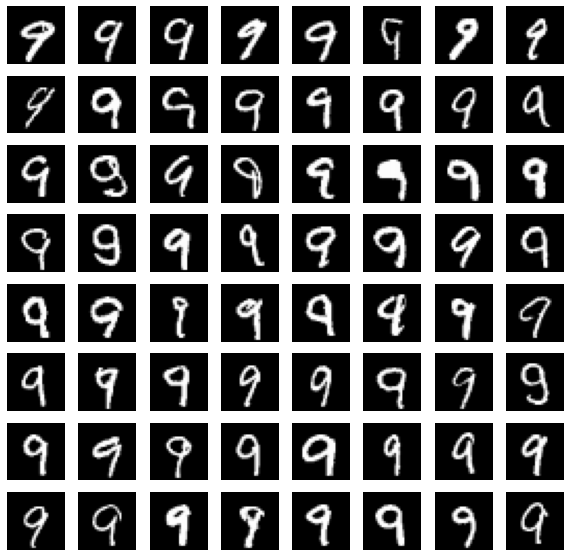

In [12]:
ShowImg(result[9])

In [13]:
true_label = np.argmax(m_test_y,axis=1)
predict_label = np.argmax(pred_y,axis=1)
pd.crosstab(true_label,predict_label,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,1,2,0,0,0,0,0,3,1
1,0,1130,2,1,0,0,0,1,1,0
2,1,1,1020,1,1,0,1,5,2,0
3,0,0,1,998,0,7,0,3,1,0
4,0,0,1,0,972,0,2,1,0,6
5,2,0,0,3,0,883,1,0,3,0
6,6,1,0,1,1,3,940,0,6,0
7,0,3,7,2,1,0,0,1009,3,3
8,2,0,1,2,0,0,0,1,966,2


In [14]:
def ShowLayer(data, num_layer=1):
    data = np.expand_dims(data, axis=0)
    layer = K.function([m_model.layers[0].input], [m_model.layers[num_layer].output])
    f1 = layer([data])[0]
    num = f1.shape[-1]
    plt.figure(figsize=(10, 10))
    for i in range(num):
        plt.subplot(8,8, i+1)
        plt.imshow(f1[0, :, :, i] * 255, cmap='gray')
        plt.axis('off')
    plt.show()

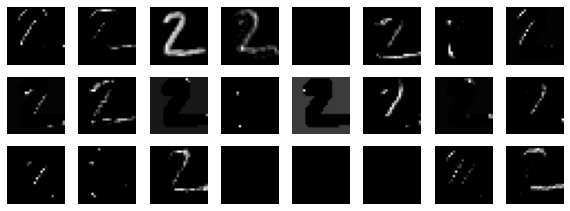

In [15]:
ShowLayer(m_test_x[1],0)

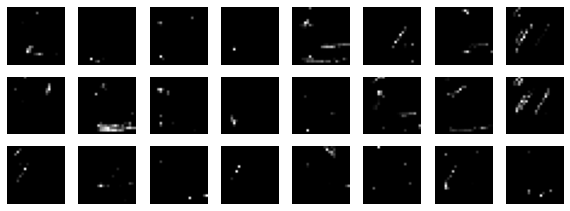

In [16]:
ShowLayer(m_test_x[1],1)

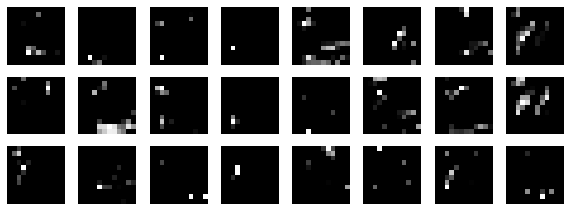

In [17]:
ShowLayer(m_test_x[1],2)

In [18]:
with open("./model/model.json", "w") as json_file:
    json_file.write(m_model.to_json())
    m_model.save("./model/model.h5")